In [1]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq

In [2]:
data, fsamp = sf.read('./signalV 1.wav')

In [3]:
fsamp

192000

**Paso 1**. Encuentren la representación en el tiempo y en la frecuencia de la señal
entregada. Esto les permitirá saber que frecuencias pueden utilizar en la
demodulación.

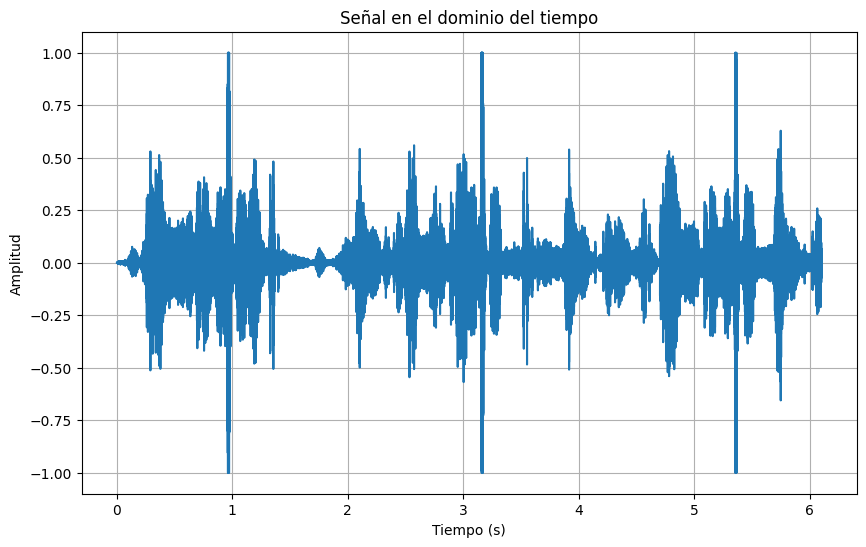

In [4]:
time = np.arange(0, len(data))/fsamp
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

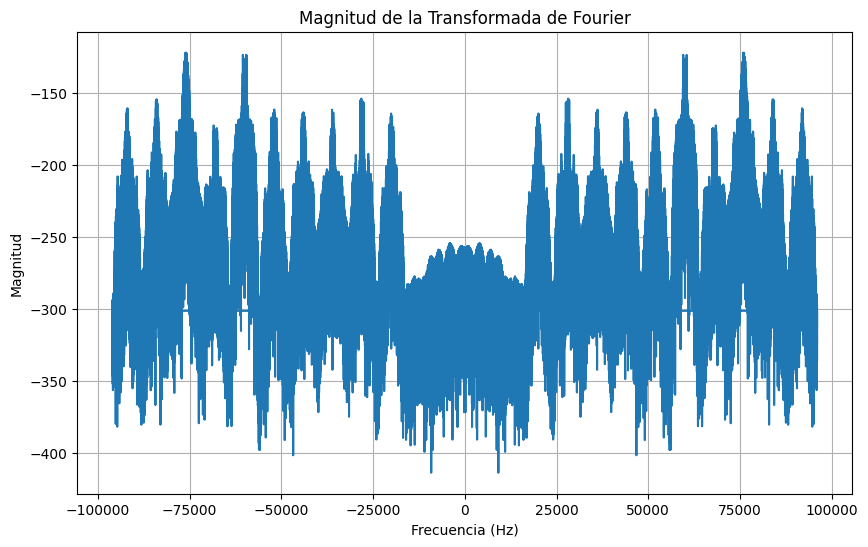

In [93]:
fft_data = fft(data)/len(data)
freqs = fftfreq(len(data), 1/fsamp)
Sx = 10 * np.log((np.abs(fft_data))**2) 

plt.figure(figsize=(10, 6))
plt.plot(freqs, Sx)
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
# plt.xlim(40000,50000)
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [77]:
# Mezclar la senal original con una sinusoidal con una frecuencia igual a la frecuencia central del filtro pasa banda
frecuencia_central = 60000

tiempo = np.arange(len(data)) / fsamp
# sinusoidal = np.real((np.exp(-1j * 2 * np.pi * frecuencia_central * tiempo)))
sinusoidal = np.cos(2 * np.pi * frecuencia_central * tiempo)

# Multiplicar la señal de interés por la sinusoidal (Desplazar)
senal_modulada =  sinusoidal * data

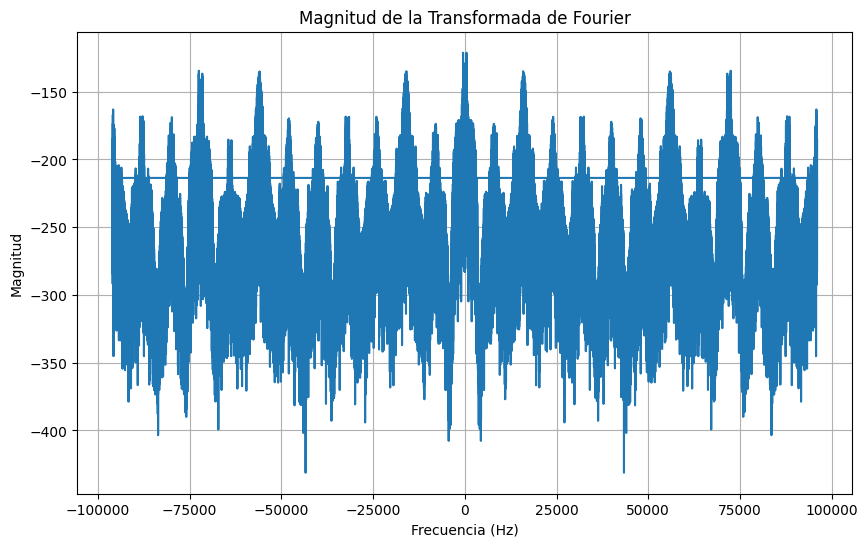

In [78]:
fft_senal_modulada2 = fft(senal_modulada)/len(senal_modulada)
freqs_senal_modulada2 = fftfreq(len(senal_modulada), 1/fsamp)
Sx = 10 * np.log((np.abs(fft_senal_modulada2))**2) 

plt.figure(figsize=(10, 6))
plt.plot(freqs_senal_modulada2, Sx)
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [97]:
# Filtro pasa bajas
sos2 = signal.butter(10, [5000], fs=fsamp, btype='lowpass', output='sos')
data2_filtrada = signal.sosfilt(sos2, senal_modulada)

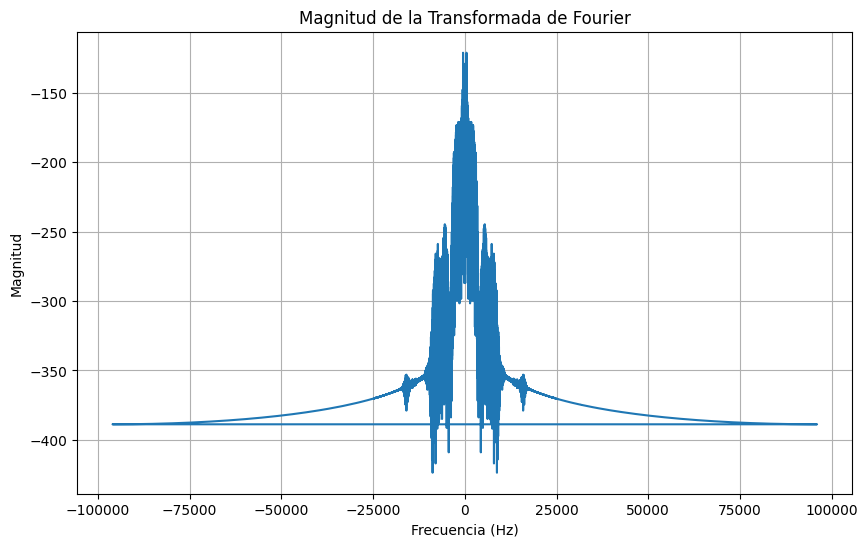

In [98]:
fft_senal_filtrada_2 = fft(data2_filtrada)/len(data2_filtrada)
freqs_senal_filtrada_2 = fftfreq(len(data2_filtrada), 1/fsamp)
Sx = 10 * np.log((np.abs(fft_senal_filtrada_2))**2) 

plt.figure(figsize=(10, 6))
plt.plot(freqs_senal_filtrada_2, Sx)
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [100]:
sd.play(data2_filtrada, fsamp)

# Filtro pasabandas

In [66]:
fcorte = [56000, 64000]  
fcorte_rad1 = [2 * np.pi * 56000, 2 * np.pi * 64000]
orden_filtro = 10

In [67]:
# Diseñar el filtro pasa banda
sos = signal.butter(orden_filtro, fcorte, fs=fsamp, btype='bandpass', output='sos')


In [68]:
# Filtrar la señal
data_filtrada = signal.sosfilt(sos, data)

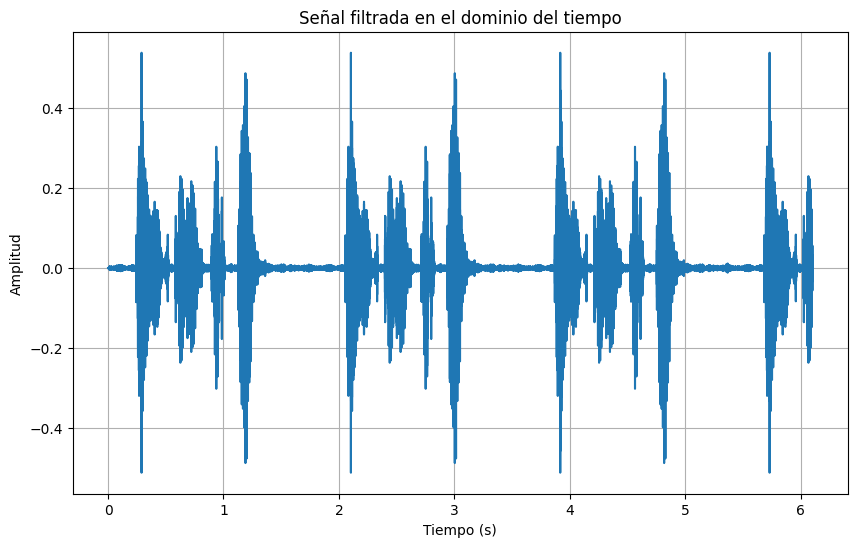

In [69]:
# Graficar la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(time, data_filtrada)
plt.title('Señal filtrada en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

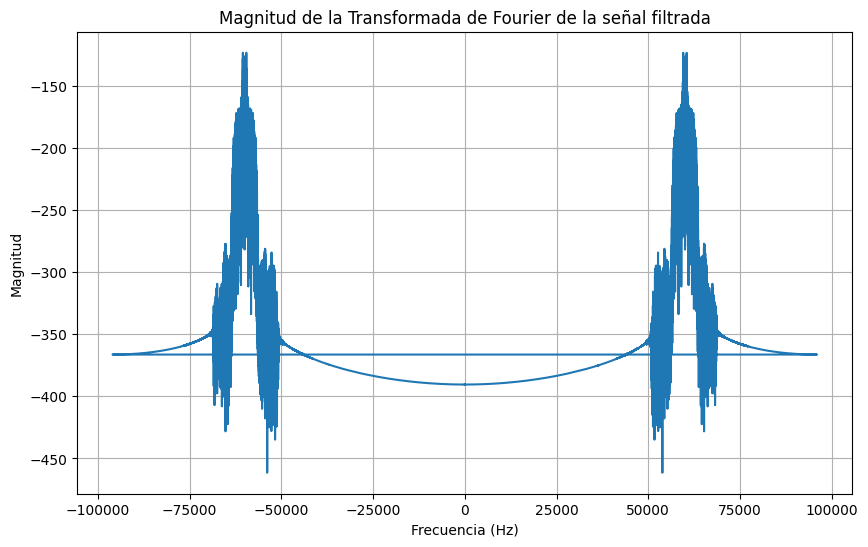

In [70]:
# Calcular la transformada de Fourier de la señal filtrada
fft_data_filtrada = fft(data_filtrada)/len(data_filtrada)
freqs_data_filtrada = fftfreq(len(data_filtrada), 1/fsamp)
Sx_data_filtrada = 10 * np.log((np.abs(fft_data_filtrada))**2) 

# Graficar la magnitud de la transformada de Fourier de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(freqs, Sx_data_filtrada)
plt.title('Magnitud de la Transformada de Fourier de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [71]:
# Mezclar la senal original con una sinusoidal con una frecuencia igual a la frecuencia central del filtro pasa banda
frecuencia_central = 60000

tiempo = np.arange(len(data)) / fsamp
# sinusoidal = np.real((np.exp(-1j * 2 * np.pi * frecuencia_central * tiempo)))
sinusoidal = np.cos(2 * np.pi * frecuencia_central * tiempo)

# Multiplicar la señal de interés por la sinusoidal
senal_modulada =  sinusoidal * data_filtrada


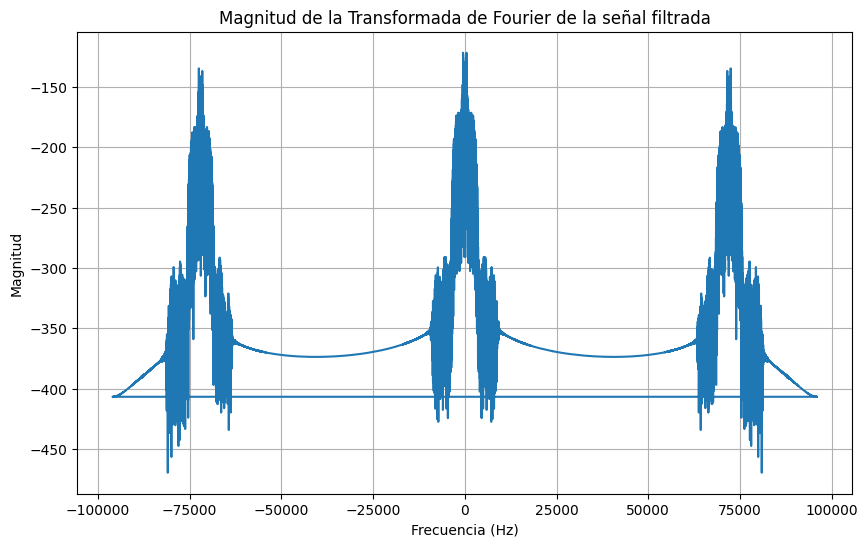

In [72]:
# Calcular la transformada de Fourier de la señal filtrada
freqs_senal_modulada = fftfreq(len(senal_modulada), 1/fsamp)
fft_senal_modulada = fft(senal_modulada)/len(senal_modulada)

Sx_senal_modulada = 10 * np.log((np.abs(fft_senal_modulada))**2) 

# Graficar la magnitud de la transformada de Fourier de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(freqs, Sx_senal_modulada)
plt.title('Magnitud de la Transformada de Fourier de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [73]:
# Filtro pasa bajas
sos2 = signal.butter(orden_filtro, [10000], fs=fsamp, btype='lowpass', output='sos')
data2_filtrada = signal.sosfilt(sos2, senal_modulada)

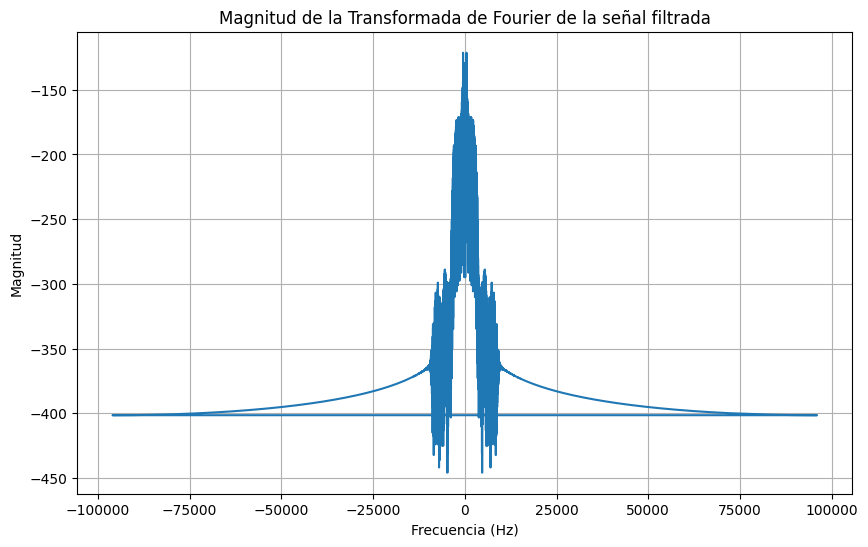

In [74]:
fft_data2_filtrada = fft(data2_filtrada)/len(data2_filtrada)
fft_data2_freq = fftfreq(len(data2_filtrada), 1/fsamp)
Sx_data2 = 10 * np.log((np.abs(fft_data2_filtrada))**2) 

# Graficar la magnitud de la transformada de Fourier de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(freqs, Sx_data2)
plt.title('Magnitud de la Transformada de Fourier de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [101]:
sd.play(data2_filtrada, fsamp)

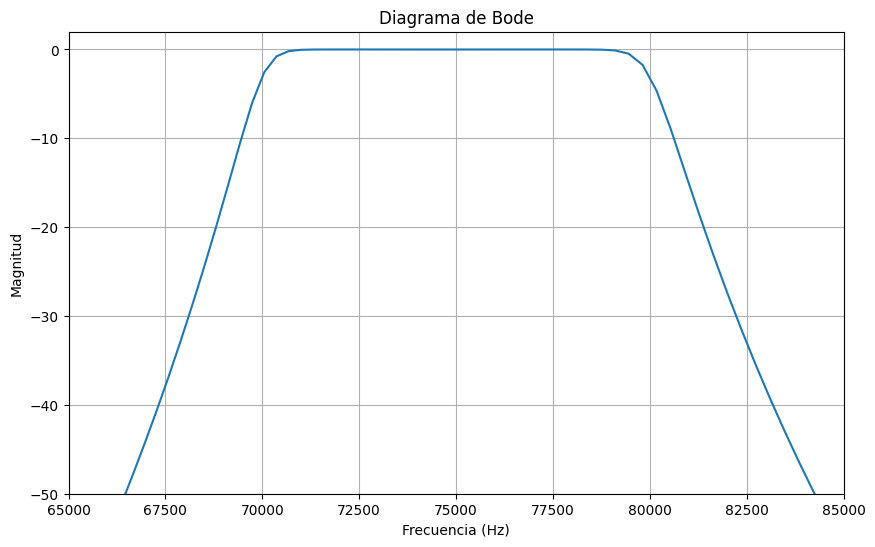

In [20]:
# Diagrama de bode
b,a = signal.butter(orden_filtro, fcorte, analog=True, btype='bandpass', output='ba')
sys = signal.TransferFunction(b, a)
w, mag, phase = signal.bode(sys, n=4096)

plt.figure(figsize=(10, 6))
plt.plot(w, mag)
plt.title('Diagrama de Bode')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.ylim(-50,2)
plt.xlim(65000,85000)
plt.grid(True)
plt.show()

In [41]:
# Mezclar la senal original con una sinusoidal con una frecuencia igual a la frecuencia central del filtro pasa banda
frecuencia_central = (fcorte[0] + fcorte[1]) / 2

tiempo = np.arange(len(data)) / fsamp
senal_modulada_amplitud = data_filtrada * np.exp(1j * 2 * np.pi * frecuencia_central * tiempo)
sinusoidal = np.exp(-1j * 2 * np.pi * frecuencia_central * tiempo)

# Multiplicar la señal de interés por la sinusoidal
senal_modulada = senal_modulada_amplitud * data_filtrada


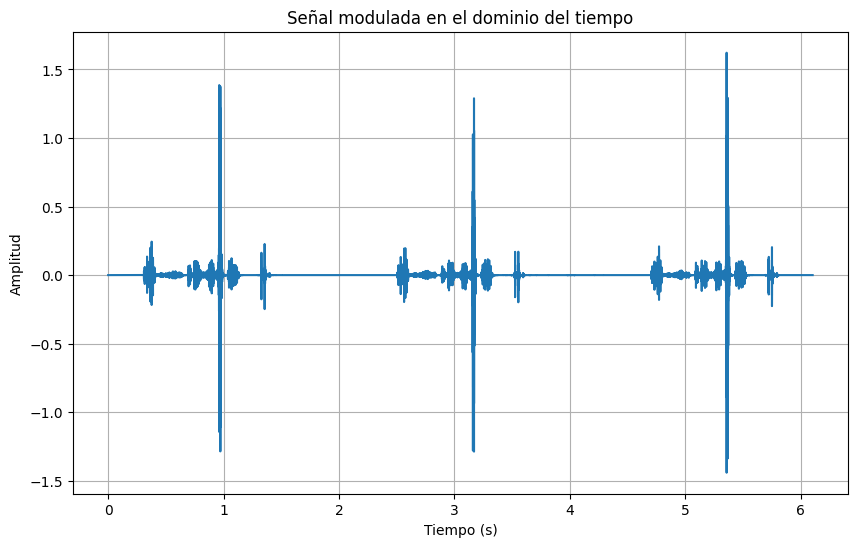

In [43]:
# Graficar senal modulada en el tiempy la frecuencia
plt.figure(figsize=(10, 6))
plt.plot(time, senal_modulada.real)
plt.title('Señal modulada en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


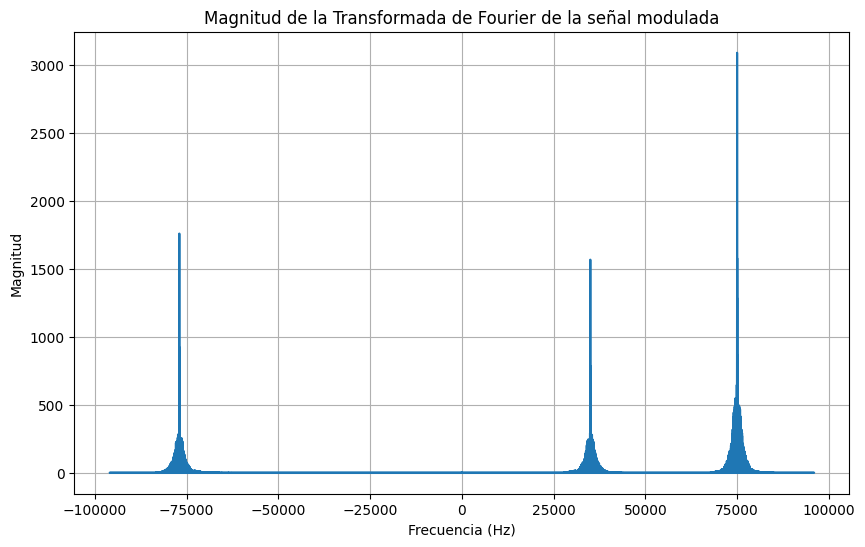

In [45]:
# Calcular la transformada de Fourier de la señal modulada
fft_senal_modulada = fft(senal_modulada)

# Graficar la magnitud de la transformada de Fourier de la señal modulada
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_senal_modulada))
plt.title('Magnitud de la Transformada de Fourier de la señal modulada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [47]:
# Reproducir la señal modulada
sd.play(data_filtrada, fsamp)